In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
from matplotlib.colors import to_hex
from matplotlib.lines import Line2D

In [29]:
def load_data_dp(path):
    methods = ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse", "userknn_no", "userknn_full"]
    
    Ks = np.load("results/" + path + "/K.npy")
    
    mean_absolute_error = dict()
    privacy_risk_dp = dict()
    frac_vulnerables = dict()
    for m in methods:
        mean_absolute_error[m] = np.load("results/" + path + "/mae_" + m + ".npy")
        privacy_risk_dp[m] = np.load("results/" + path + "/privacy_risk_dp_" + m + ".npy")
        frac_vulnerables[m] = np.load("results/" + path + "/fraction_vulnerables_" + m + ".npy")

    return {"K": Ks,
            "mae": mean_absolute_error, 
            "privacy_risk_dp": privacy_risk_dp, 
            "fraction_vulnerables": frac_vulnerables}

ml1m = load_data_dp(path="unprotected/ml-1m")
douban = load_data_dp(path="unprotected/douban")
lfm = load_data_dp(path="unprotected/lfm")
ciao = load_data_dp(path="unprotected/ciao")
goodreads = load_data_dp(path="unprotected/goodreads")

ml1m_dp = load_data_dp(path="protected/ml-1m")
douban_dp = load_data_dp(path="protected/douban")
lfm_dp = load_data_dp(path="protected/lfm")
ciao_dp = load_data_dp(path="protected/ciao")
goodreads_dp = load_data_dp(path="protected/goodreads")

In [61]:
for m in ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    result = ""
    for data in [ml1m, douban, lfm, ciao, goodreads]:
        mae = data["mae"][m][k_idx]
        pr = data["privacy_risk_dp"][m][k_idx]
        result += ("%.2f & %.2f & " % (mae, pr))
    
    print(result)

0.80 & 330.77 & 0.66 & 665.17 & 47.46 & 844.94 & 0.78 & 35.21 & 0.80 & 182.26 & 
0.79 & 330.77 & 0.65 & 665.17 & 46.78 & 844.94 & 0.78 & 35.21 & 0.80 & 182.26 & 
0.78 & 330.77 & 0.64 & 665.17 & 43.12 & 844.94 & 0.78 & 35.21 & 0.81 & 182.26 & 
0.77 & 330.77 & 0.64 & 665.17 & 44.37 & 844.94 & 0.78 & 35.21 & 0.80 & 182.26 & 
0.77 & 330.77 & 0.64 & 665.17 & 44.71 & 844.94 & 0.78 & 35.21 & 0.78 & 182.26 & 
0.77 & 330.77 & 0.64 & 665.17 & 45.28 & 844.94 & 0.78 & 35.21 & 0.78 & 182.26 & 


In [62]:
for m in ["userknn_full", "userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    result = ""
    for data in [ml1m_dp, douban_dp, lfm_dp, ciao_dp, goodreads_dp]:
        mae = data["mae"][m][k_idx]
        pr = data["privacy_risk_dp"][m][k_idx]
        result += ("%.2f & %.2f & " % (mae, pr))
    
    print(result)

0.83 & 0.00 & 0.69 & 0.00 & 128.41 & 0.00 & 0.87 & 0.00 & 0.85 & 0.00 & 
0.82 & 84.39 & 0.68 & 89.86 & 118.80 & 103.77 & 0.81 & 27.61 & 0.83 & 75.71 & 
0.81 & 87.16 & 0.68 & 87.16 & 118.13 & 103.56 & 0.81 & 26.54 & 0.83 & 68.35 & 
0.80 & 31.03 & 0.68 & 43.25 & 111.78 & 86.81 & 0.82 & 21.53 & 0.85 & 40.95 & 
0.80 & 31.43 & 0.68 & 49.33 & 114.37 & 92.85 & 0.82 & 21.42 & 0.84 & 40.77 & 
0.79 & 35.30 & 0.68 & 46.57 & 115.31 & 93.95 & 0.81 & 26.74 & 0.81 & 55.90 & 
0.79 & 36.60 & 0.68 & 51.55 & 116.04 & 96.07 & 0.81 & 25.87 & 0.82 & 52.48 & 


In [30]:
def normalize_results(results, metric="mae", k_idx=1):
    scores = dict()
    for m in ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse", "userknn_no", "userknn_full"]:
        s = results[metric][m][k_idx] / results[metric]["userknn"][k_idx]
        scores[m] = s
    
    return scores

In [36]:
accuracy = normalize_results(ml1m, metric="mae")
vulnerables = normalize_results(ml1m, metric="fraction_vulnerables")
privacy_risk = normalize_results(ml1m, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.04/1.24/0.00
userknn_reuse: 0.99/1.05/1.00
expect: 0.97/0.30/1.00
expect_reuse: 0.97/0.31/1.00
gain: 0.96/0.31/1.00
gain_reuse: 0.96/0.34/1.00


In [37]:
accuracy = normalize_results(douban, metric="mae")
vulnerables = normalize_results(douban, metric="fraction_vulnerables")
privacy_risk = normalize_results(douban, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.04/1.03/0.00
userknn_reuse: 0.98/0.90/1.00
expect: 0.97/0.36/1.00
expect_reuse: 0.98/0.43/1.00
gain: 0.97/0.39/1.00
gain_reuse: 0.97/0.45/1.00


In [38]:
accuracy = normalize_results(lfm, metric="mae")
vulnerables = normalize_results(lfm, metric="fraction_vulnerables")
privacy_risk = normalize_results(lfm, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 2.71/1.00/0.00
userknn_reuse: 0.99/0.99/1.00
expect: 0.91/0.68/1.00
expect_reuse: 0.93/0.79/1.00
gain: 0.94/0.80/1.00
gain_reuse: 0.95/0.84/1.00


In [39]:
accuracy = normalize_results(ciao, metric="mae")
vulnerables = normalize_results(ciao, metric="fraction_vulnerables")
privacy_risk = normalize_results(ciao, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.11/12.47/0.00
userknn_reuse: 1.00/0.99/1.00
expect: 1.00/0.98/1.00
expect_reuse: 1.00/0.97/1.00
gain: 1.00/1.02/1.00
gain_reuse: 1.00/1.00/1.00


In [40]:
accuracy = normalize_results(goodreads, metric="mae")
vulnerables = normalize_results(goodreads, metric="fraction_vulnerables")
privacy_risk = normalize_results(goodreads, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.06/1.54/0.00
userknn_reuse: 0.99/0.80/1.00
expect: 1.00/0.45/1.00
expect_reuse: 0.99/0.43/1.00
gain: 0.97/0.62/1.00
gain_reuse: 0.97/0.57/1.00


In [31]:
accuracy = normalize_results(ml1m_dp, metric="mae")
vulnerables = normalize_results(ml1m_dp, metric="fraction_vulnerables")
privacy_risk = normalize_results(ml1m_dp, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.01/1.24/0.00
userknn_reuse: 0.98/1.05/1.03
expect: 0.97/0.30/0.37
expect_reuse: 0.97/0.31/0.37
gain: 0.96/0.31/0.42
gain_reuse: 0.96/0.34/0.43


In [32]:
accuracy = normalize_results(douban_dp, metric="mae")
vulnerables = normalize_results(douban_dp, metric="fraction_vulnerables")
privacy_risk = normalize_results(douban_dp, metric="privacy_risk_dp")
for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.01/1.03/0.00
userknn_reuse: 1.00/0.90/0.97
expect: 1.00/0.36/0.48
expect_reuse: 1.00/0.43/0.55
gain: 1.00/0.39/0.52
gain_reuse: 1.00/0.45/0.57


In [33]:
accuracy = normalize_results(lfm_dp, metric="mae")
vulnerables = normalize_results(lfm_dp, metric="fraction_vulnerables")
privacy_risk = normalize_results(lfm_dp, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.08/1.00/0.00
userknn_reuse: 0.99/0.99/1.00
expect: 0.94/0.69/0.84
expect_reuse: 0.96/0.79/0.89
gain: 0.97/0.81/0.91
gain_reuse: 0.98/0.85/0.93


In [34]:
accuracy = normalize_results(ciao_dp, metric="mae")
vulnerables = normalize_results(ciao_dp, metric="fraction_vulnerables")
privacy_risk = normalize_results(ciao_dp, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.07/12.61/0.00
userknn_reuse: 1.00/0.98/0.96
expect: 1.02/0.98/0.78
expect_reuse: 1.02/0.96/0.78
gain: 1.00/1.02/0.97
gain_reuse: 1.00/0.99/0.94


In [35]:
accuracy = normalize_results(goodreads_dp, metric="mae")
vulnerables = normalize_results(goodreads_dp, metric="fraction_vulnerables")
privacy_risk = normalize_results(goodreads_dp, metric="privacy_risk_dp")

for m in ["userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    print("%s: %.2f/%.2f/%.2f" % (m, accuracy[m], vulnerables[m], privacy_risk[m]))

userknn_full: 1.02/1.54/0.00
userknn_reuse: 1.00/0.81/0.90
expect: 1.02/0.45/0.54
expect_reuse: 1.01/0.43/0.54
gain: 0.98/0.62/0.74
gain_reuse: 0.98/0.57/0.69


In [25]:
def f(results): 
    accuracy = []
    accuracy.append(results["mae"]["userknn"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["userknn_reuse"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["expect"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["expect_reuse"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["gain"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["gain_reuse"][1] / results["mae"]["userknn"][1])

    vulnerables = []
    vulnerables.append(results["fraction_vulnerables"]["userknn"][1] / results["fraction_vulnerables"]["userknn"][1])
    vulnerables.append(results["fraction_vulnerables"]["userknn_reuse"][1] / results["fraction_vulnerables"]["userknn"][1])
    vulnerables.append(results["fraction_vulnerables"]["expect"][1] / results["fraction_vulnerables"]["userknn"][1])
    vulnerables.append(results["fraction_vulnerables"]["expect_reuse"][1] / results["fraction_vulnerables"]["userknn"][1])
    vulnerables.append(results["fraction_vulnerables"]["gain"][1] / results["fraction_vulnerables"]["userknn"][1])
    vulnerables.append(results["fraction_vulnerables"]["gain_reuse"][1] / results["fraction_vulnerables"]["userknn"][1])

    privacy_risk = []
    privacy_risk.append(results["privacy_risk_dp"]["userknn"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["userknn_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["expect"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["expect_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["gain"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["gain_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    
    return accuracy, vulnerables, privacy_risk

In [26]:
%matplotlib inline

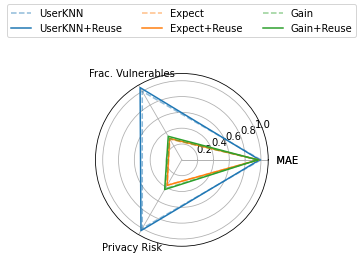

In [37]:
accuracy, vulnerables, privacy_risk = f(ml1m_dp)

angles = np.linspace(0, 2 * np.pi, 3, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

data = list(zip(accuracy, vulnerables, privacy_risk))
ax.plot(angles, np.concatenate((data[0], [data[0][0]])), label="UserKNN", color="C0", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[1], [data[1][0]])), label="UserKNN+Reuse", color="C0", linestyle="solid")
ax.plot(angles, np.concatenate((data[2], [data[2][0]])), label="Expect", color="C1", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[3], [data[3][0]])), label="Expect+Reuse", color="C1", linestyle="solid")
ax.plot(angles, np.concatenate((data[4], [data[4][0]])), label="Gain", color="C2", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[5], [data[5][0]])), label="Gain+Reuse", color="C2", linestyle="solid")
    
labels = ["   MAE", "Frac. Vulnerables", "Privacy Risk"]
ax.set_thetagrids(angles * 180/np.pi, np.concatenate((labels, [labels[0]])))

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

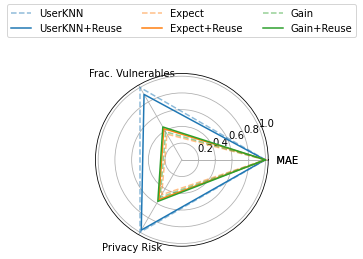

In [38]:
accuracy, vulnerables, privacy_risk = f(douban_dp)

angles = np.linspace(0, 2 * np.pi, 3, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

data = list(zip(accuracy, vulnerables, privacy_risk))
ax.plot(angles, np.concatenate((data[0], [data[0][0]])), label="UserKNN", color="C0", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[1], [data[1][0]])), label="UserKNN+Reuse", color="C0", linestyle="solid")
ax.plot(angles, np.concatenate((data[2], [data[2][0]])), label="Expect", color="C1", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[3], [data[3][0]])), label="Expect+Reuse", color="C1", linestyle="solid")
ax.plot(angles, np.concatenate((data[4], [data[4][0]])), label="Gain", color="C2", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[5], [data[5][0]])), label="Gain+Reuse", color="C2", linestyle="solid")
    
labels = ["   MAE", "Frac. Vulnerables", "Privacy Risk"]
ax.set_thetagrids(angles * 180/np.pi, np.concatenate((labels, [labels[0]])))

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

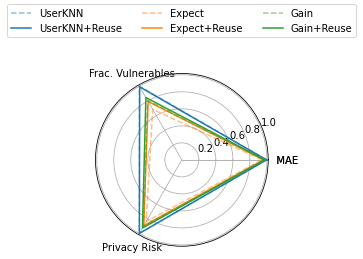

In [39]:
accuracy, vulnerables, privacy_risk = f(lfm_dp)

angles = np.linspace(0, 2 * np.pi, 3, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

data = list(zip(accuracy, vulnerables, privacy_risk))
ax.plot(angles, np.concatenate((data[0], [data[0][0]])), label="UserKNN", color="C0", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[1], [data[1][0]])), label="UserKNN+Reuse", color="C0", linestyle="solid")
ax.plot(angles, np.concatenate((data[2], [data[2][0]])), label="Expect", color="C1", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[3], [data[3][0]])), label="Expect+Reuse", color="C1", linestyle="solid")
ax.plot(angles, np.concatenate((data[4], [data[4][0]])), label="Gain", color="C2", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[5], [data[5][0]])), label="Gain+Reuse", color="C2", linestyle="solid")
    
labels = ["   MAE", "Frac. Vulnerables", "Privacy Risk"]
ax.set_thetagrids(angles * 180/np.pi, np.concatenate((labels, [labels[0]])))

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

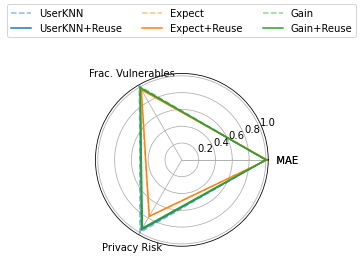

In [40]:
accuracy, vulnerables, privacy_risk = f(ciao_dp)

angles = np.linspace(0, 2 * np.pi, 3, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

data = list(zip(accuracy, vulnerables, privacy_risk))
ax.plot(angles, np.concatenate((data[0], [data[0][0]])), label="UserKNN", color="C0", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[1], [data[1][0]])), label="UserKNN+Reuse", color="C0", linestyle="solid")
ax.plot(angles, np.concatenate((data[2], [data[2][0]])), label="Expect", color="C1", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[3], [data[3][0]])), label="Expect+Reuse", color="C1", linestyle="solid")
ax.plot(angles, np.concatenate((data[4], [data[4][0]])), label="Gain", color="C2", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[5], [data[5][0]])), label="Gain+Reuse", color="C2", linestyle="solid")
    
labels = ["   MAE", "Frac. Vulnerables", "Privacy Risk"]
ax.set_thetagrids(angles * 180/np.pi, np.concatenate((labels, [labels[0]])))

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

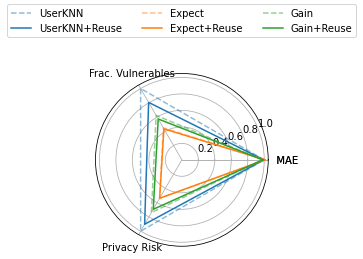

In [41]:
accuracy, vulnerables, privacy_risk = f(goodreads_dp)

angles = np.linspace(0, 2 * np.pi, 3, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

data = list(zip(accuracy, vulnerables, privacy_risk))
ax.plot(angles, np.concatenate((data[0], [data[0][0]])), label="UserKNN", color="C0", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[1], [data[1][0]])), label="UserKNN+Reuse", color="C0", linestyle="solid")
ax.plot(angles, np.concatenate((data[2], [data[2][0]])), label="Expect", color="C1", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[3], [data[3][0]])), label="Expect+Reuse", color="C1", linestyle="solid")
ax.plot(angles, np.concatenate((data[4], [data[4][0]])), label="Gain", color="C2", linestyle="dashed", alpha=0.5)
ax.plot(angles, np.concatenate((data[5], [data[5][0]])), label="Gain+Reuse", color="C2", linestyle="solid")
    
labels = ["   MAE", "Frac. Vulnerables", "Privacy Risk"]
ax.set_thetagrids(angles * 180/np.pi, np.concatenate((labels, [labels[0]])))

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

In [43]:
def f(results):
    accuracy = []
    accuracy.append(results["mae"]["userknn"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["userknn_reuse"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["expect"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["expect_reuse"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["gain"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["gain_reuse"][1] / results["mae"]["userknn"][1])

    privacy_risk = []
    privacy_risk.append(results["privacy_risk_dp"]["userknn"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["userknn_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["expect"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["expect_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["gain"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["gain_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    
    return accuracy, privacy_risk

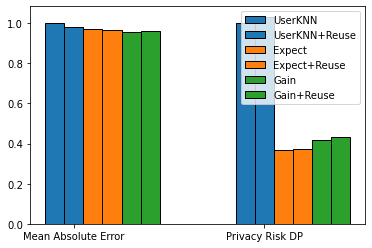

In [44]:
accuracy, privacy_risk = f(ml1m_dp)
userknn, userknn_reuse, expect, expect_reuse, gain, gain_reuse = list(zip(accuracy, privacy_risk))

# width of the bars
barWidth = 0.1

# The x position of bars
r1 = np.arange(len(userknn_full))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

plt.bar(r1, userknn, width = barWidth, color = 'C0', edgecolor = 'black', capsize=7, label='UserKNN')
plt.bar(r2, userknn_reuse, width = barWidth, color = 'C0', edgecolor = 'black', capsize=7, label='UserKNN+Reuse')
plt.bar(r3, expect, width = barWidth, color = 'C1', edgecolor = 'black', capsize=7, label='Expect')
plt.bar(r4, expect_reuse, width = barWidth, color = 'C1', edgecolor = 'black', capsize=7, label='Expect+Reuse')
plt.bar(r5, gain, width = barWidth, color = 'C2', edgecolor = 'black', capsize=7, label='Gain')
plt.bar(r6, gain_reuse, width = barWidth, color = 'C2', edgecolor = 'black', capsize=7, label='Gain+Reuse')
 
# general layout
plt.xticks([r + barWidth for r in range(len(userknn_full))], ["Mean Absolute Error", "Privacy Risk DP"])
plt.legend()

In [54]:
def f(results):
    accuracy = []
    accuracy.append(results["mae"]["userknn_full"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["userknn_no"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["userknn"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["userknn_reuse"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["expect"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["expect_reuse"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["gain"][1] / results["mae"]["userknn"][1])
    accuracy.append(results["mae"]["gain_reuse"][1] / results["mae"]["userknn"][1])

    privacy_risk = []
    privacy_risk.append(results["privacy_risk_dp"]["userknn_full"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["userknn_no"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["userknn"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["userknn_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["expect"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["expect_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["gain"][1] / results["privacy_risk_dp"]["userknn"][1])
    privacy_risk.append(results["privacy_risk_dp"]["gain_reuse"][1] / results["privacy_risk_dp"]["userknn"][1])
    
    return accuracy, privacy_risk

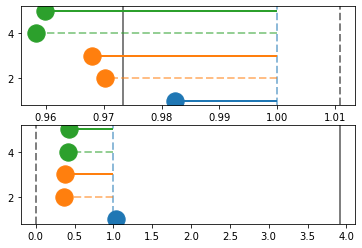

In [139]:
mae, privacy_risk = f(ml1m_dp)

fig, axes = plt.subplots(2, 1, sharex=False)

barwidth=0.25
userknn_full_bar = np.array([mae[0]] * 8)
userknn_no_bar = np.array([mae[1]] * 8)
userknn_bar = np.array([mae[2]] * 8)
bars = mae[3:]

r1 = np.arange(len(userknn_full_bar))
r2 = [p + barwidth for p in r1]
r3 = [p + barwidth for p in r2]
r4 = [p + barwidth for p in r3]
r5 = [p + barwidth for p in r4]
r6 = [p + barwidth for p in r5]

#plt.figure(figsize=(9, 4))
axes[0].axvline(x=userknn_full_bar[0], linestyle="dashed", color="gray", linewidth=2, zorder=1, label=r"Full$_{DP}$")
axes[0].axvline(x=userknn_no_bar[0], linestyle="solid", color="gray", linewidth=2, zorder=1, label=r"UserKNN")
axes[0].axvline(x=userknn_bar[0], linestyle="dashed", color="C0", linewidth=2, zorder=1, label=r"UserKNN$_{DP}$", alpha=0.5)

axes[0].hlines(y=1, xmin=userknn_bar[0], xmax=bars[0], linewidth=2, color="C0")
axes[0].scatter(bars[0], 1, color="C0", s=300, zorder=2)

axes[0].hlines(y=2, xmin=userknn_bar[1], xmax=bars[1], linewidth=2, color="C1", alpha=0.5, linestyle="dashed")
axes[0].scatter(bars[1], 2, color="C1", s=300, zorder=2, alpha=1)

axes[0].hlines(y=3, xmin=userknn_bar[2], xmax=bars[2], linewidth=2, color="C1")
axes[0].scatter(bars[2], 3, color="C1", s=300, zorder=2)

axes[0].hlines(y=4, xmin=userknn_bar[3], xmax=bars[3], linewidth=2, color="C2", alpha=0.5, linestyle="dashed")
axes[0].scatter(bars[3], 4, color="C2", s=300, zorder=2, alpha=1)

axes[0].hlines(y=5, xmin=userknn_bar[4], xmax=bars[4], linewidth=2, color="C2")
axes[0].scatter(bars[4], 5, color="C2", s=300, zorder=2)





barwidth=0.25
userknn_full_bar = np.array([privacy_risk[0]] * 8)
userknn_no_bar = np.array([privacy_risk[1]] * 8)
userknn_bar = np.array([privacy_risk[2]] * 8)
bars = privacy_risk[3:]

r1 = np.arange(len(userknn_full_bar))
r2 = [p + barwidth for p in r1]
r3 = [p + barwidth for p in r2]
r4 = [p + barwidth for p in r3]
r5 = [p + barwidth for p in r4]
r6 = [p + barwidth for p in r5]

#plt.figure(figsize=(9, 4))
axes[1].axvline(x=userknn_full_bar[0], linestyle="dashed", color="gray", linewidth=2, zorder=1, label=r"Full$_{DP}$")
axes[1].axvline(x=userknn_no_bar[0], linestyle="solid", color="gray", linewidth=2, zorder=1, label=r"UserKNN")
axes[1].axvline(x=userknn_bar[0], linestyle="dashed", color="C0", linewidth=2, zorder=1, label=r"UserKNN$_{DP}$", alpha=0.5)

axes[1].hlines(y=1, xmin=userknn_bar[0], xmax=bars[0], linewidth=2, color="C0")
axes[1].scatter(bars[0], 1, color="C0", s=300, zorder=2)

axes[1].hlines(y=2, xmin=userknn_bar[1], xmax=bars[1], linewidth=2, color="C1", alpha=0.5, linestyle="dashed")
axes[1].scatter(bars[1], 2, color="C1", s=300, zorder=2, alpha=1)

axes[1].hlines(y=3, xmin=userknn_bar[2], xmax=bars[2], linewidth=2, color="C1")
axes[1].scatter(bars[2], 3, color="C1", s=300, zorder=2)

axes[1].hlines(y=4, xmin=userknn_bar[3], xmax=bars[3], linewidth=2, color="C2", alpha=0.5, linestyle="dashed")
axes[1].scatter(bars[3], 4, color="C2", s=300, zorder=2, alpha=1)

axes[1].hlines(y=5, xmin=userknn_bar[4], xmax=bars[4], linewidth=2, color="C2")
axes[1].scatter(bars[4], 5, color="C2", s=300, zorder=2)